# Import Library

In [ ]:
import pandas as pd # mengelola dataset
import numpy as np #numerical computation

# library Visualisasi
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import scipy
from scipy import stats


# Import Dataset

In [ ]:
df = pd.read_csv("E_Commerce_Dataset.csv")
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


# Data Cleaning

In [ ]:
df.drop('CustomerID', inplace=True, axis=1)
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


# 1. Descriptive Statistics

In [ ]:
df.describe()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.217940
std,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193878
min,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5366 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5379 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5375 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

In [ ]:
# Mengecek data kosong dalam DataFrame
kolom_kosong = df.columns[df.isna().any()].tolist()

if len(kolom_kosong) > 0:
    print("Ya, ada kolom dengan nilai kosong. Kolom-kolom tersebut adalah:")
    for kolom in kolom_kosong:
        print(kolom)
else:
    print("Tidak ada kolom dengan nilai kosong dalam DataFrame.")

Ya, ada kolom dengan nilai kosong. Kolom-kolom tersebut adalah:
Tenure
WarehouseToHome
HourSpendOnApp
OrderAmountHikeFromlastYear
CouponUsed
OrderCount
DaySinceLastOrder


### Statistical Summary 1

In [ ]:
df.describe()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.217940
std,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193878
min,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


berdasarkan dataset tampak tidak ada nilai summary yang secara langsung aneh atau tidak mungkin dalam data tersebut.

### Statistical Summary 2

In [ ]:
df.describe(include = 'object')

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


Dari statistical summary diatas dapat disimpulkan bahwa tidak terdapat missing value pada data yang bertipe kategori

# 2. Univariete Analysis

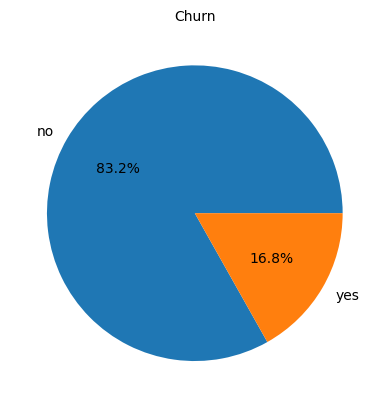

In [ ]:
labels = ("no", "yes")
sizes = df['Churn'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Churn", fontsize=10)
plt.show()

Hasil Observasi:
- Berdasarkan dataset yang ada dapat diketahui presentase customer yang retain mendominasi dengan presentase 83.2%
- Tidak terdapat outlier karena data bersifat kategorik

### Kolom bertipe Kategori

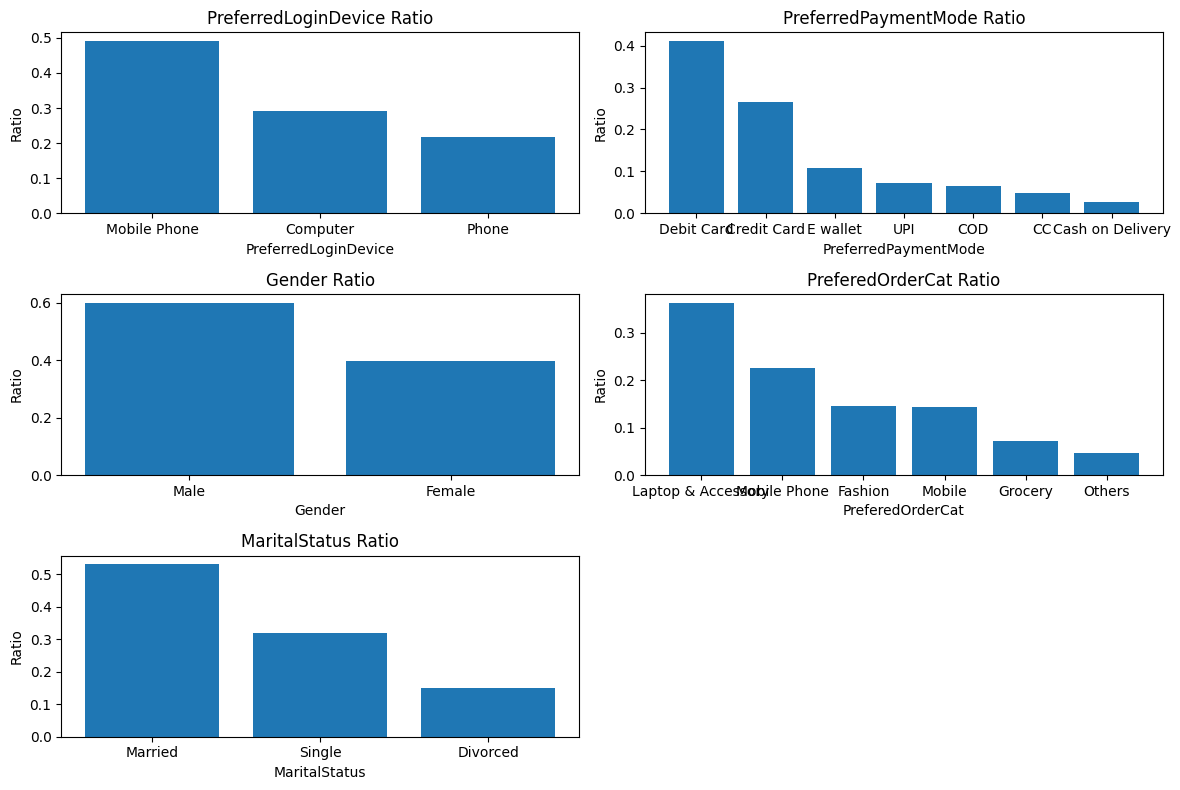

In [ ]:
# Mengidentifikasi kolom yang bertipe objek (kategori)
object_columns = df.select_dtypes(include=['object']).columns

# Menentukan ukuran subplot dan jumlah baris dan kolom
n = len(object_columns)
rows = (n + 1) // 2
cols = 2

# Membuat subplot
fig, axes = plt.subplots(rows, cols, figsize=(12, 8))

# Melakukan loop melalui kolom yang bertipe objek
for i, column in enumerate(object_columns):
    row = i // cols
    col = i % cols
    column_counts = df[column].value_counts(normalize=True)

    axes[row, col].bar(column_counts.index, column_counts)
    axes[row, col].set_title(f"{column} Ratio")
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Ratio')

# Menyusun subplot yang tidak terpakai
for i in range(n, rows * cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

Hasil Observasi:
- **PreferredLoginDevice** : Device yang paling sering digunakan untuk melakukan login oleh customer adalah MObile Phone yang memiliki rasio paling besar dibandingkan 2 kategori yang lain sehingga Mobile Phone mendominasi chart.
- **PreferredPaymentMode**: Debit card dan Credit Card merupakan metode pembayaran yang paling diminati customer berdasarkan data dalam datset melihat 2 kategori tersebut memiliki perbedaan yang cukup signifikan dari kategori lainnya.
- **PreferedOrderCat**: Laptop & Accessory merupakan nilai yang mendominasi dalam variable Order Cat denga jumlah ratio paling tinggi berbanding dengan nilai-nilai lainnya.
- **Gender**: Pada variable Gender dapat terlihat bahwa customer yang bergender male lebih banyak daripada yang bergender female. Hal ini dapat dibuktikan dari distribusi plot tersebut gender male lebih besar rasionya daripada female.
- **MaritalStatus**: Pada plot distribusi tersebut menunjukan bahwa customer yang berstatus menikah lebih mendominasi daripada yang berstatus single maupun cerai.

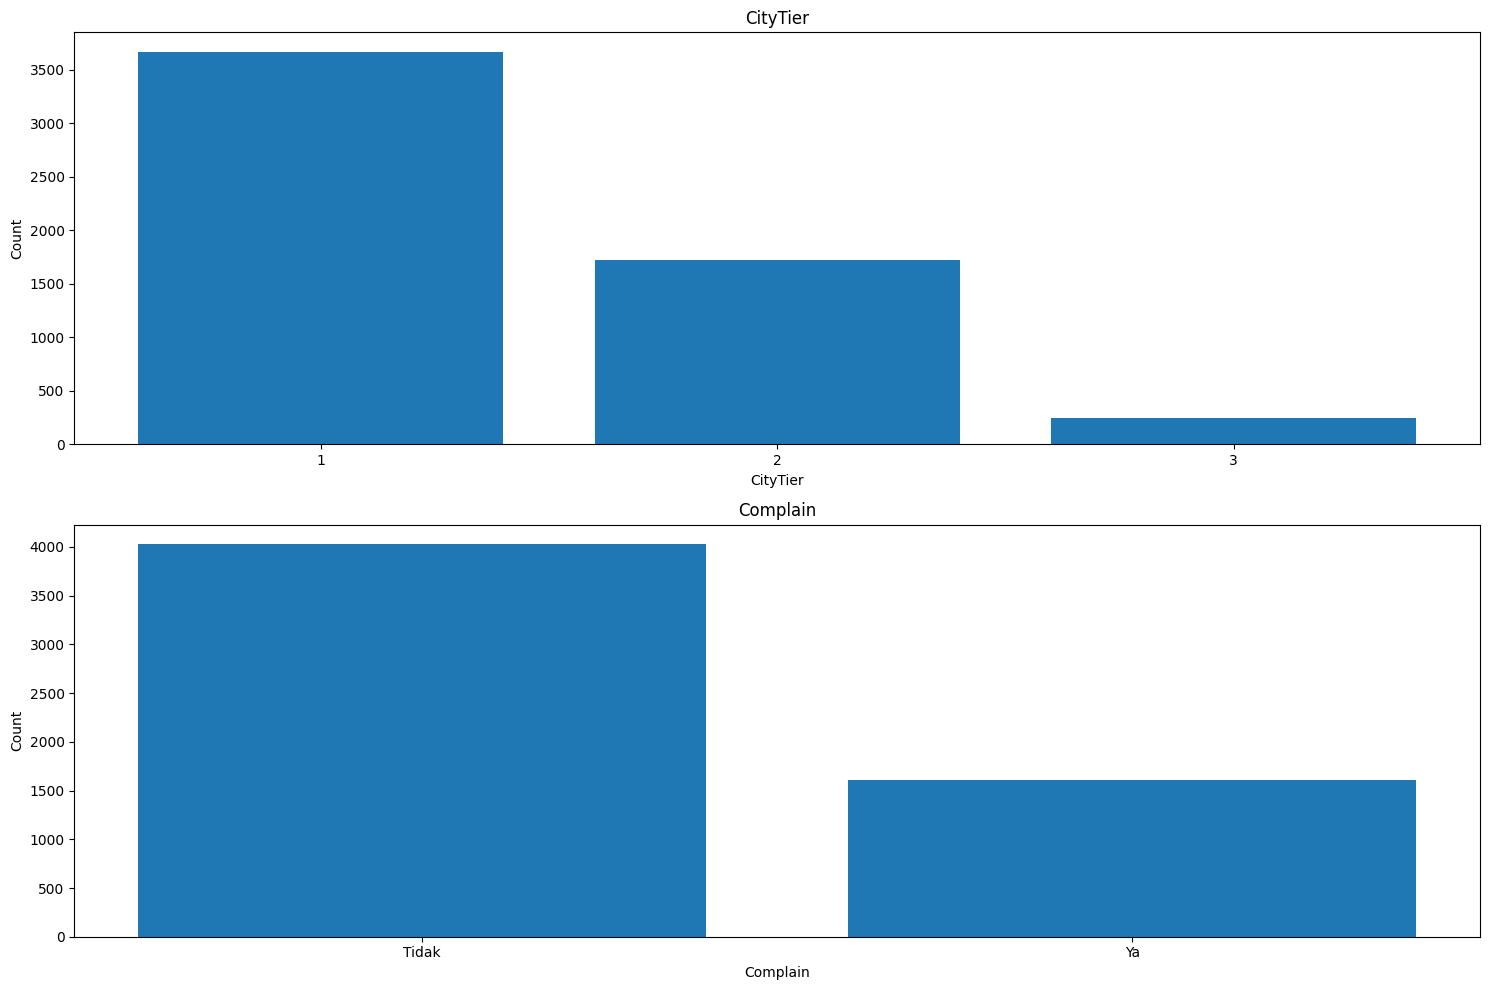

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Plot CityTier
city_tier_counts = df['CityTier'].value_counts()
city_tier_names = ['1', '2', '3']
axes[0].bar(city_tier_names, city_tier_counts)
axes[0].set_title('CityTier')
axes[0].set_xlabel('CityTier')
axes[0].set_ylabel('Count')

# Plot Complain
complain_counts = df['Complain'].value_counts()
complain_names = ['Tidak', 'Ya']
axes[1].bar(complain_names, complain_counts)
axes[1].set_title('Complain')
axes[1].set_xlabel('Complain')
axes[1].set_ylabel('Count')

# Menyusun subplot
plt.tight_layout()
plt.show()

Hasil Observasi :
- **CityTier**:Dari plot tersebut terlihat Tier 1 memeiliki frekuensi paling tinggi daripada Tier 2 dan 3.menandakan Customer dari E-Commerce didominasi oleh customer-customer dari Kota di Tier 1
- **Complain**:Berdasarkan distribusi plot frekuensi jumlah customer yang tidak melakukan complain lebih banyak dari yang melakukan complain sehingga mendominasi variable complain.hal ini  menandakan dalam rentang waktu sebagian besar tersebut customer memiliki pengalaman berbelanja yang cukup baik.

### Kolom bertipe Numerik

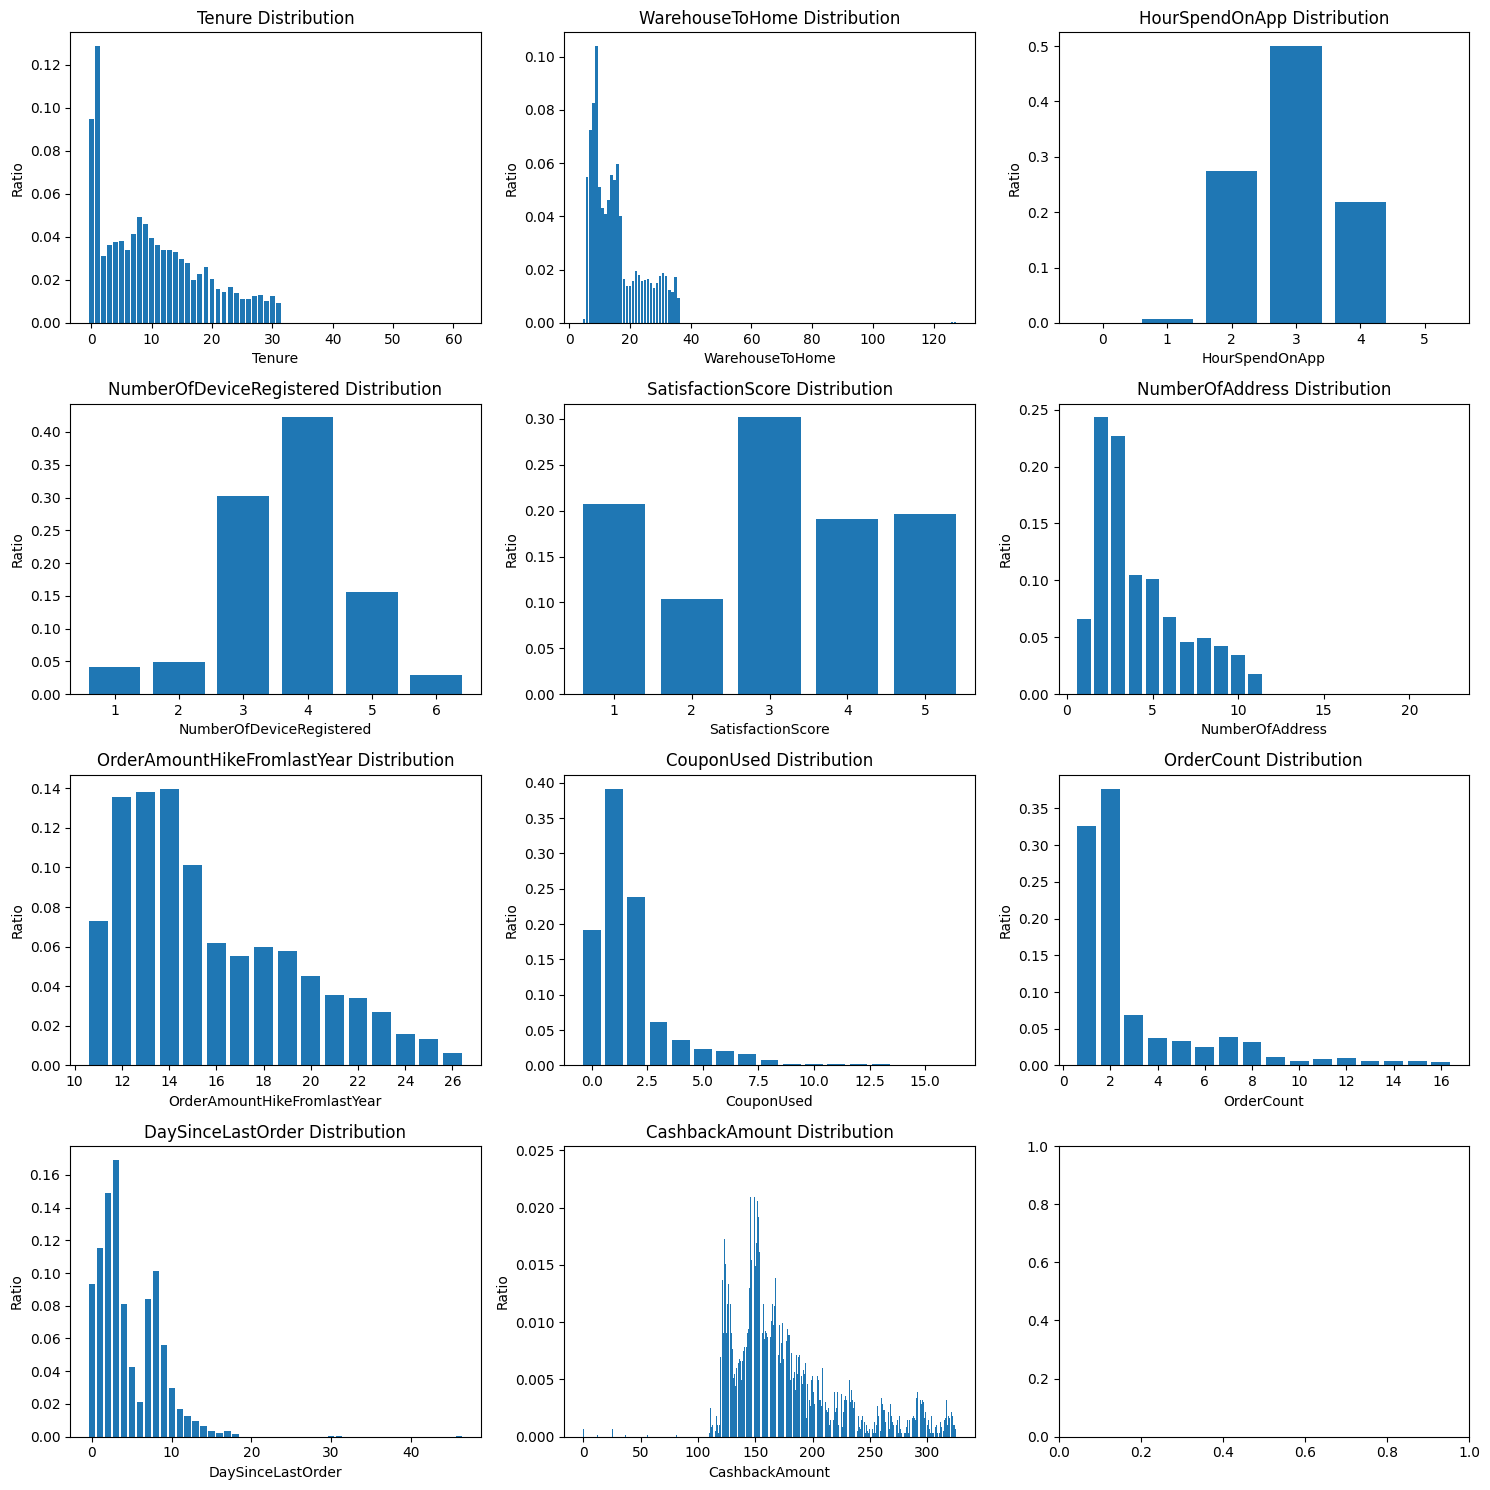

In [ ]:
# Mengidentifikasi kolom yang bertipe numerik
excluded_columns = ['Churn', 'CityTier', 'Complain']
numeric_columns = [col for col in df.select_dtypes(include=['int', 'float']).columns if col not in excluded_columns]

# Membuat subplot dalam satu gambar dengan 4 kolom dan 3 baris
fig, axes = plt.subplots(4, 3, figsize=(15, 15))

# Loop melalui kolom yang bertipe numerik
for i, column in enumerate(numeric_columns):
    row = i // 3
    col = i % 3

    # Menghitung rasio (persentase) dari distribusi
    ratio = df[column].value_counts(normalize=True)

    # Membuat plot bar dengan sumbu Y sebagai 'Ratio'
    axes[row, col].bar(ratio.index, ratio)
    axes[row, col].set_title(f'{column} Distribution')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Ratio')

# Menyusun subplot
plt.tight_layout()
plt.show()

Hasil Observasi:
- **Tenure** : Pada distribusi plot  variable Tenure terlihat bahwa grafik yang terbentuk berjenis positively skewed dengan terdapat banyak data outlier dan nilai kosong. sehingga diharapkan pada tahap data pre-processing hal ini dapat diatasi.
- **WarehouseToHome**: Distribusi plot tersebut menunjukan bahwa grafik  yang terbentuk berjenis positively skewed dengan data outlier dan juga nilai kosong dengan jarak tempuh yang mendominasi antara 0-20 KM.
- **HourSpendOnApp**: distribusi plot yang terbentuk adalah distribusi plot yang berjenis normal. Namun,didalam plot tersebut masih terdapat data outlier dan nilai kosong yang diharapkan pada tahap data pre-processing data dapat diatasi.
- **NumberOfDeviceRegistered**: distribusi plot tersebut menggambarkan jumlah device yang terdaftar atas customer tertentu pada plot tersebut dapat terlihat bahwa customer yang terdaftar mayoritas menggunakan 4 Device.
- **SatisfactionScore**: Mayoritas customer memiliki tingkat kepuasan pada kategori 4 melihat bahwa kategori 4 mendominasi chart dengan rasio tertinggi dan membentuk normal skew.
- **NumberOfAddress**: distribution plot tersebut menggambarkan jumlah addres yang digunakan per customernya untuk melakukan order dari data tersebut terdapat outlier yang menyebabkan ketimpangan pada data yang cukup signifikan sehingga membentuk positively skewed.
- **OrderAmountHikeFromlastYear**: Distribusi plot tersebut membetuk positively skewed terdapat outlier serta data kosong yang perlu diatasi di tahap berikutnya
- **CouponUsed**: Pada distribution plot tersebut dapat terlihat jelas bahwa kolom tersebut memiliki data outlier sehingga distribusi plot tersebut membetuk positively skewed, pada data -pre-processing di tahap selanjutnya diharapkan dapat mengatasi beberapa data kosong pada kolom Coupon Used.
- **OrderCount**: Dari distibusi plot tersebut dapat terlihat bahwa kategori pada plot tersebut cukup banyak serta memiliki outlier sehingga jenis skew yang terbentuk adalah positively skewed dan pada kolom OrderCount terdapat data kosong yang harus diatasi.
- **DaySinceLastOrder**: Distribusi yang terbentuk berjenis positively skewed namun dapat terlihat persebarannya membetuk grafik bimodal karena ada dua puncak atau kelompok data yang signifikan dalam distribusitersebut dan masih terdapat data kosong yang perlu diatasi pada tahap selanjutnya.
- **CashbackAmount**: Distribusi plot tersebut berjenis positively skewed terdapat dalam distribusi tersebut terlihat banyak data outlier sehinggap diharapkan hal ini dapat teratasi pada tahap data pre-processing

# 3. Multivariate Analysis

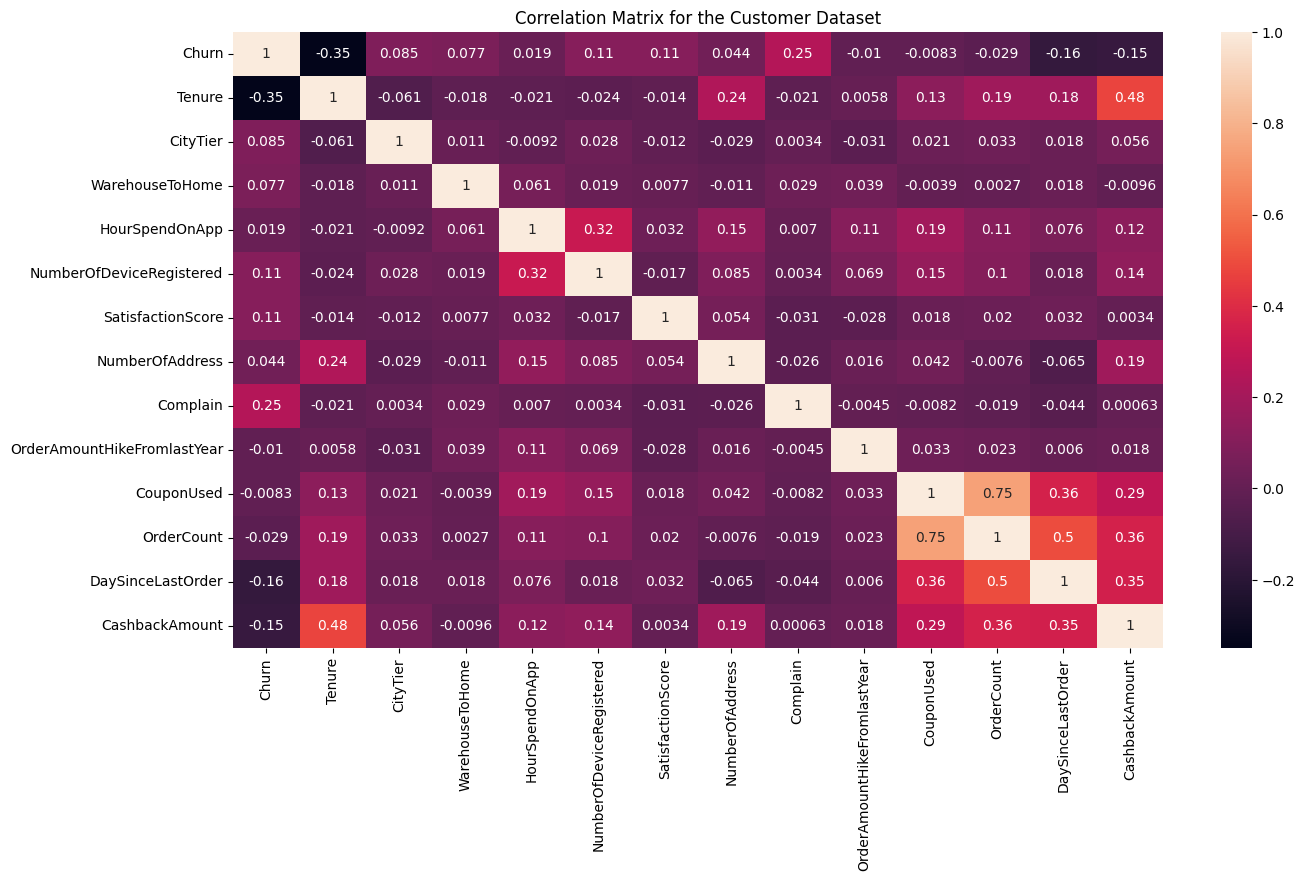

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title("Correlation Matrix for the Customer Dataset")
plt.show()

A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana
saja yang paling relevan dan harus dipertahankan?

*  Korelasi seluruh feature, kecuali korelasi antara feature OrderCount dan CouponUsed, memiliki nilai di bawah 0,7 yang berarti feature-feature tersebut masih relevan dan dapat dipertahankan.
*  Feature OrderCount dan CouponUsed memiliki nilai korelasi sebesar 0,75 yang berarti lebih besar dari nilai batas




B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu
dilakukan terhadap feature itu?


- Ada 4.682 pengguna (82,2%) yang tetap menggunakan layanan, sementara 948 pengguna (16,8%) telah berhenti berlangganan.
- Pelanggan menghabiskan waktu 2-4 jam di aplikasi.
- Pelanggan umumnya hanya memesan 1-2 kali.
- Jarak dari gudang ke rumah tidak memengaruhi churn pelanggan.
- Pelanggan yang mengajukan keluhan dan memiliki status tunggal memiliki tingkat churn yang lebih tinggi.
- Dari matriks korelasi, korelasi antara WarehouseToHome dan Churn adalah 0,07 (0,069544 untuk lebih tepatnya). Ini berarti korelasi yang lemah atau tidak ada korelasi.

#  4. Business Insight

In [ ]:
object_cat = df.select_dtypes(include='object')

In [ ]:
for col in object_cat.columns:
    object_cat[col] = object_cat[col].astype('category')

object_cat.columns
object_cat.head()

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,Mobile Phone,Debit Card,Female,Laptop & Accessory,Single
1,Phone,UPI,Male,Mobile,Single
2,Phone,Debit Card,Male,Mobile,Single
3,Phone,Debit Card,Male,Laptop & Accessory,Single
4,Phone,CC,Male,Mobile,Single


In [ ]:
def object_columns_vs_Churn(column):
    churn_ = df.groupby(column)['Churn'].value_counts(normalize=True).to_frame()
    churn_.columns = ['Proportion']
    churn_pvt = churn_.reset_index().\
    pivot(columns='Churn', index=column, values='Proportion')
    churn_pvt.fillna(0, inplace=True)
    display(churn_pvt*100)

    contingency = df.groupby([column, 'Churn']).agg({'Churn':'count'}).rename(columns={'Churn':'Count'}).reset_index().pivot(index=column, columns='Churn', values='Count')
    stat, p, dof, expected = chi2_contingency(contingency)
    if(p<0.05):
        print(f'Column {column} has strong relationship with Churn.')
    else:
        print(f'Column {column} has weak relationship with Churn.')

    churn_pvt.plot(kind='bar', stacked=True, figsize=(13,10))
    plt.title(f'Churn Off proportion by {column}')
    plt.show()
    print

Churn,0,1
PreferredLoginDevice,,
Computer,80.171359,19.828641
Mobile Phone,87.414105,12.585895
Phone,77.579204,22.420796


Column PreferredLoginDevice has strong relationship with Churn.


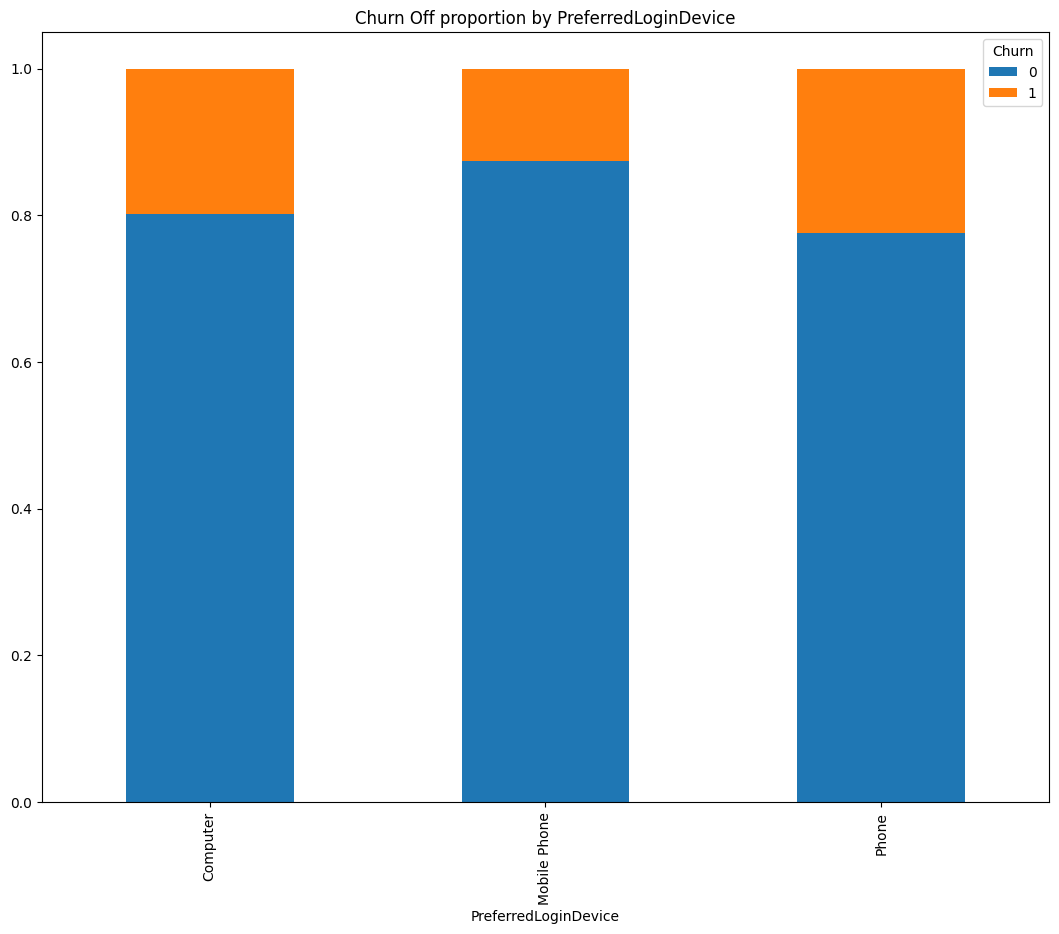

Churn,0,1
PreferredPaymentMode,,
CC,78.388278,21.611722
COD,71.232877,28.767123
Cash on Delivery,84.563758,15.436242
Credit Card,87.141905,12.858095
Debit Card,84.615385,15.384615
E wallet,77.198697,22.801303
UPI,82.608696,17.391304


Column PreferredPaymentMode has strong relationship with Churn.


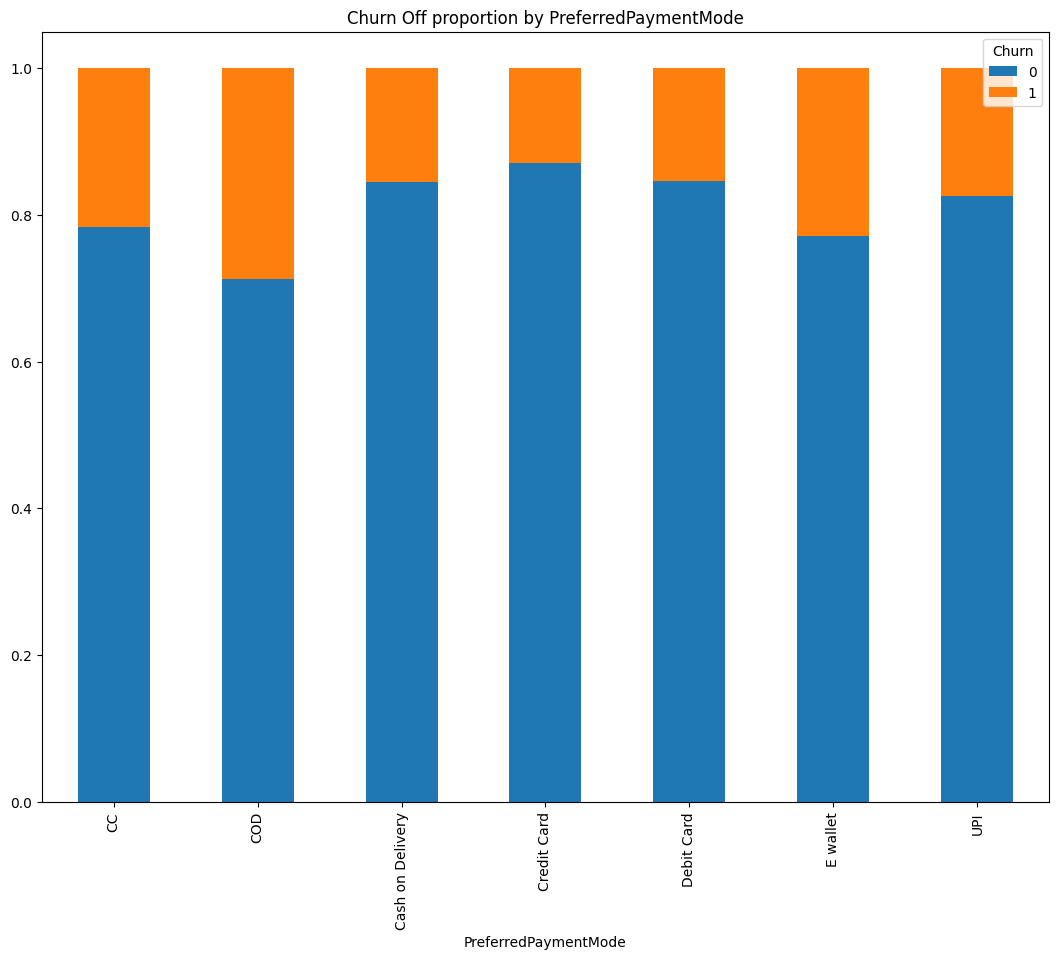

Churn,0,1
Gender,,
Female,84.505788,15.494212
Male,82.269504,17.730496


Column Gender has strong relationship with Churn.


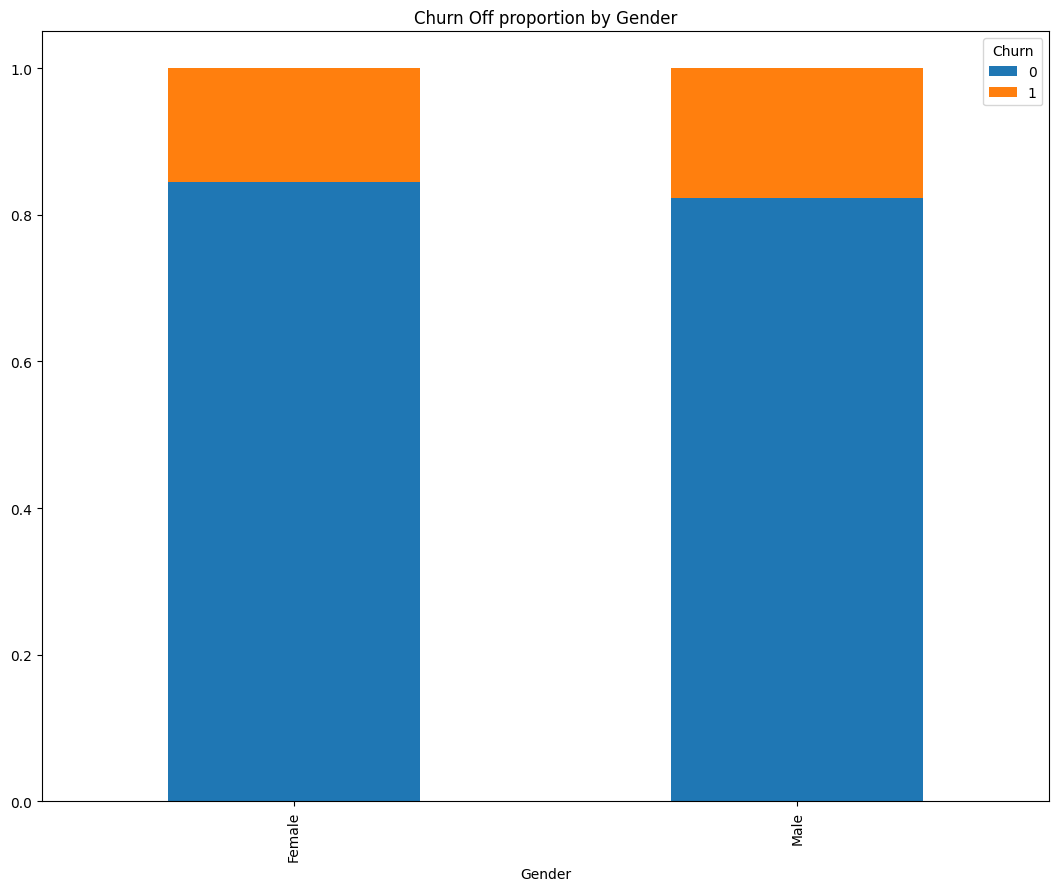

Churn,0,1
PreferedOrderCat,,
Fashion,84.503632,15.496368
Grocery,95.121951,4.878049
Laptop & Accessory,89.756098,10.243902
Mobile,72.805933,27.194067
Mobile Phone,72.462628,27.537372
Others,92.424242,7.575758


Column PreferedOrderCat has strong relationship with Churn.


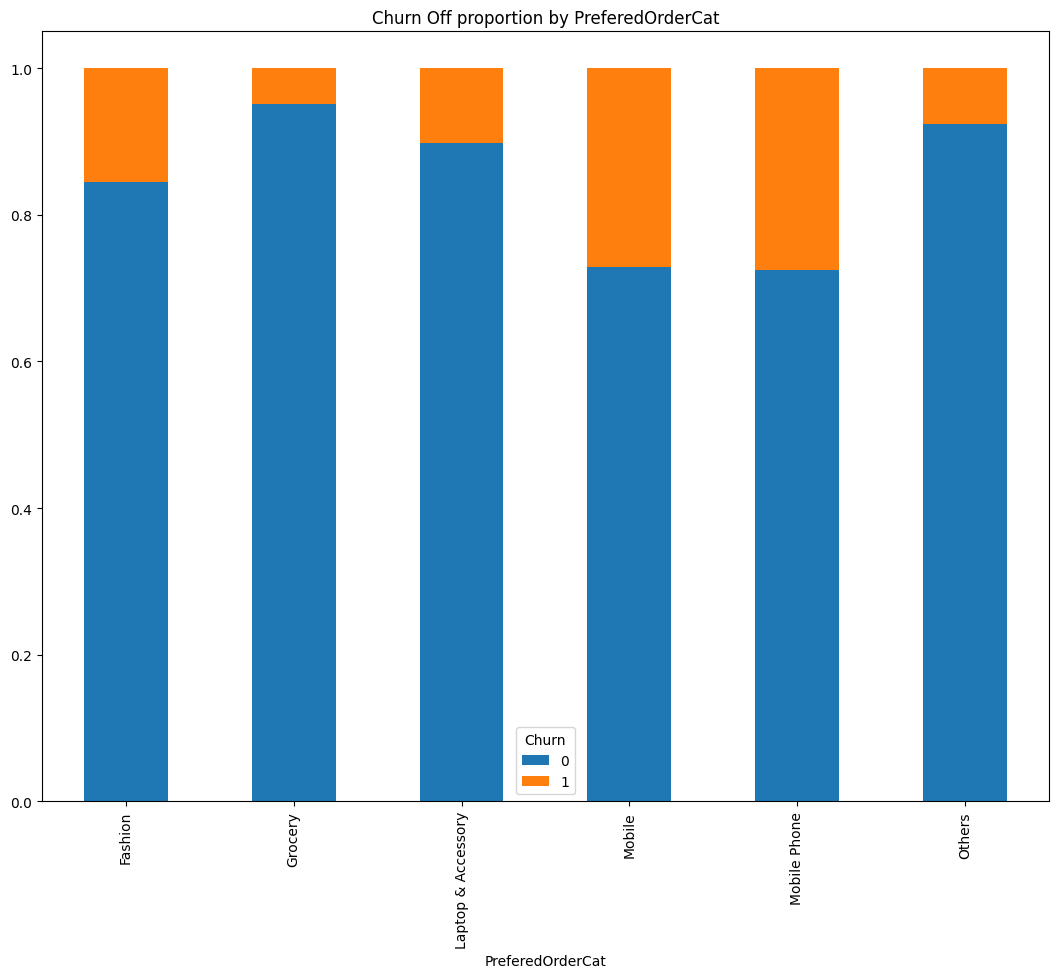

Churn,0,1
MaritalStatus,,
Divorced,85.377358,14.622642
Married,88.479571,11.520429
Single,73.273942,26.726058


Column MaritalStatus has strong relationship with Churn.


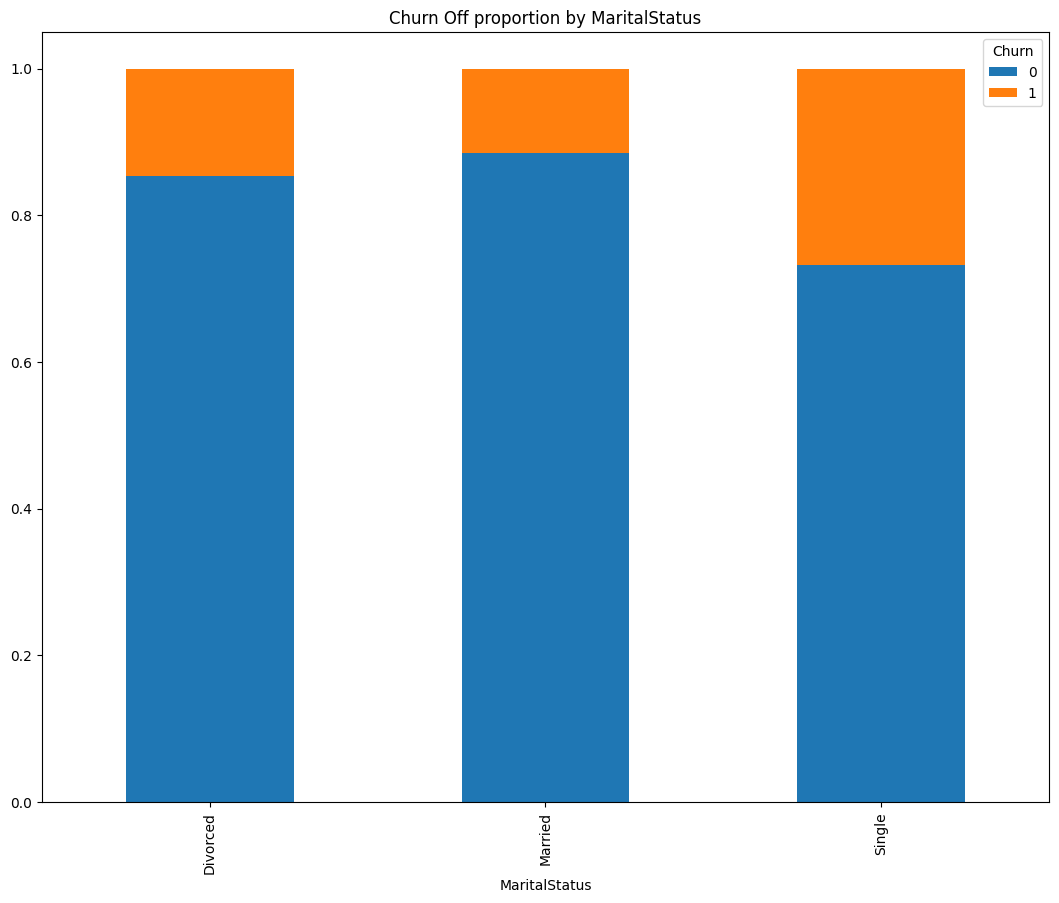

In [ ]:
for col in object_cat.columns:
    object_columns_vs_Churn(col)

## Insight:

1. PrefferedLoginDevice:
*   Grafik menunjukkan bahwa mayoritas pelanggan yang paling tinggi churn login device menggunakan phone
*   Device computer menduduki peringkat kedua sebagai device yang paling banyak churn sebagai login device
*   Mobile phone merupakan device yang paling sedikit churn yang digunakan pelanggan sebagai login device

Karena banyaknya pelanggan yang churn menggunakan phone, pastikan
bahwa situs web atau aplikasi e-commerce dioptimalkan dengan baik untuk
penggunaan phone. Pastikan tampilan responsif, kecepatan loading yang baik, dan
navigasi yang mudah untuk perangkat phone.
2. PrefferedPaymetMode:
- COD menjadi metode pembayaran yang paling tinggi churn dibandingkan dengan metode pemabayaran yang lain yaitu (28.767123)
- E-Wallet   menjadi urutan kedua metode pembayaran yang churn yaitu sebanyak (22.801303)
- CC menjadi urutan ketiga sebagai metode pembayaran yang memiliki churn tinggi (21.611722)

- lalu di ikuti dengan metode pembayaran lain yang memiliki chrun lebih rendah UPI (17.391304), Cash on Delivery (15.436242), Debit Card (15.384615),  dan Credit Card (12.858095).

Dengan pemahaman tentang preferensi pembayaran pelanggan, perusahaan dapat menyesuaikan strategi pemasaran dan pembayaran mereka. Ini dapat mencakup promosi khusus untuk metode pembayaran tertentu atau penyediaan opsi pembayaran yang lebih luas untuk mencapai lebih banyak pelanggan.Pemahaman tentang preferensi pembayaran pelanggan dapat membantu perusahaan mengoptimalkan pengalaman pelanggan dan strategi pemasaran mereka untuk meningkatkan penjualan dan kepuasan pelanggan.

3. Gender :
- Pelanggan Laki-laki Mengalami Churn yang Lebih Tinggi: Jumlah pelanggan laki-laki yang berhenti berlangganan (17.730496) lebih tinggi daripada pelanggan perempuan (15.494212). Ini menunjukkan bahwa laki-laki memiliki tingkat churn yang lebih tinggi dalam dataset ini.

- Pelanggan Laki-laki Lebih Banyak: Total pelanggan laki-laki (2668) juga lebih banyak daripada pelanggan perempuan (1831). Hal ini mungkin mengindikasikan bahwa laki-laki adalah kelompok yang lebih besar dalam populasi pelanggan.

Hal ini menandakan bahwa E-commerce perlu Fokus pada Retensi Pelanggan Laki-laki: Karena jumlah pelanggan laki-laki yang berhenti berlangganan lebih tinggi, perusahaan mungkin perlu lebih memfokuskan upaya pada retensi pelanggan laki-laki. Ini bisa mencakup strategi promosi khusus, layanan pelanggan yang lebih baik, atau analisis lebih lanjut tentang alasan pelanggan laki-laki cenderung berhenti berlangganan.

4. PrefferedorderCat:

- Berdasarkan grafik diatas di ketahui bahwa ordercategory  yang paling tinggi terhadap churn adalah produk mobile phone (27.537372) dan mobile  (27.194067)
- Fashion (15.496368) dan Laptop & Accesory (10.243902) menjadi urutan kedua order category yang cukup banyak churn
-  Grocery dan Others menjadi yang paling sedikit churn. Perlu diketahui bahwa category yang meimiliki churn tinggi juga disebabkan oleh order yang paling banyak diminati dan order category yang paling sedikit churn karena kurang begitu banyak peminatnya di e-commerce.

Dalam rangka meningkatkan bisnis, perusahaan dapat mempertimbangkan untuk lebih fokus pada kategori-kategori yang lebih dominan (Laptop & Accessory, Mobile Phone dan Fashion) dengan strategi promosi dan pemasaran yang lebih intensif dan lebih terpercaya untuk dapat mengurangi tingkat churn. Di sisi lain, mungkin diperlukan usaha tambahan dalam pemasaran kategori-kategori yang kurang dominan (Mobile, Grocery dan Others) untuk meningkatkan popularitas mereka di antara pelanggan.

5. MaritalStatus :

*   Terlihat bahwa pelanggan dengan status perkawinan **Single** cenderung memiliki tingkat churn yang lebih tinggi. Ini bisa mengindikasikan bahwa pelanggan lajang lebih rentan untuk berpindah dibandingkan dengan pelanggan yang sudah menikah.
*  Customer berstatus **divorce** sebagai pengguna churn tertinggi kedua walaupun menjadi customer e-commerce yang paling sedikit.
*   Status perkawinan **Married** tampaknya memiliki tingkat churn yang lebih rendah. Ini bisa menunjukkan bahwa pelanggan yang sudah menikah lebih stabil dalam hubungannya dengan perusahaan.

E-Commerce dapat lebih memperhatikan pelanggan yang berstatus single dan divorce, mungkin ada faktor-faktor khusus yang membuat pelanggan lajang lebih rentan terhadap churn. Dengan memahami lebih baik kebutuhan dan preferensi mereka, dapat mengembangkan strategi yang lebih khusus untuk mempertahankan mereka. E-Commerce dapat mempertimbangkan untuk mengembangkan penawaran atau program loyalitas khusus untuk pelanggan yang sudah menikah. Ini dapat memberikan insentif tambahan bagi mereka untuk tetap menggunakan layanan dan mungkin memperpanjang hubungan dengan perusahaan.

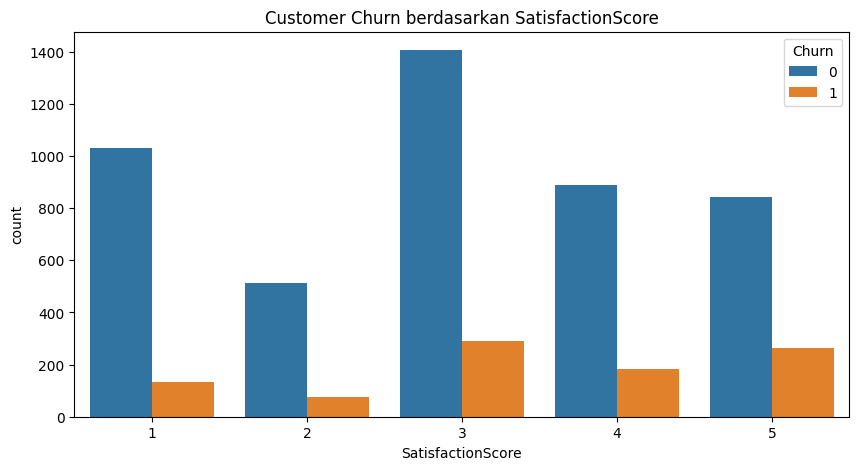

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['SatisfactionScore'], hue=df['Churn'])
plt.title('Customer Churn berdasarkan SatisfactionScore')
plt.show()

### Insight

Dalam analisis kepuasan pelanggan, terdapat pola yang signifikan yang berkaitan dengan tingkat churn. Ditemukan bahwa pelanggan dengan tingkat churn paling tinggi adalah mereka yang memberikan nilai kepuasan sebesar 3. Disusul oleh mereka yang memberikan nilai 5 dan 4, yang juga menunjukkan tingkat churn yang signifikan. Di sisi lain, pelanggan yang memberikan nilai kepuasan 1 dan 2 memiliki tingkat churn yang paling rendah dibandingkan dengan kelompok lainnya.

Hal tersebut dapat dijadikan acuan bagi pengembang untuk meningkkatkan kualitas layanan agar para pelanggan mendapatkan tingkat kepuasan yang baik sehingga pelanggan tersebut tetap menggunakan layanan yang ada.


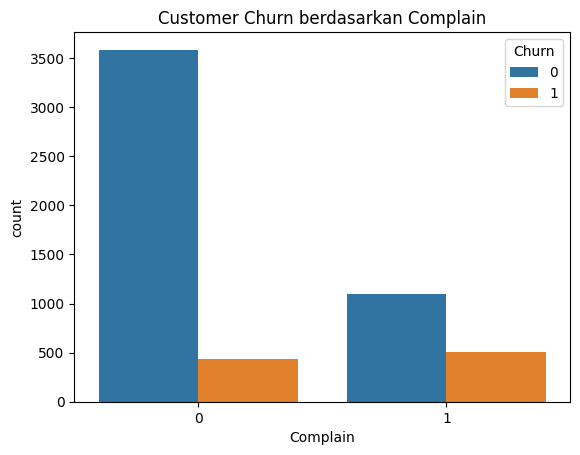

In [ ]:
sns.countplot(x=df['Complain'], hue=df['Churn'])
plt.title('Customer Churn berdasarkan Complain')
plt.show()

### Insight

Data dalam grafik secara jelas mengindikasikan bahwa pelanggan yang pernah mengajukan komplain terkait dengan layanan cenderung memiliki risiko tinggi terhadap churn, dibandingkan dengan pelanggan yang belum pernah mengajukan komplain sebelumnya.

Hal tersebut dapat dijadikan sebagai acuan oleh pengembang untuk meningkatkan kulitas dalam pelayanan dan penyelesaian masalah (complain) agar kesetiaan pelanggan terhadap layanan tetap terjaga.

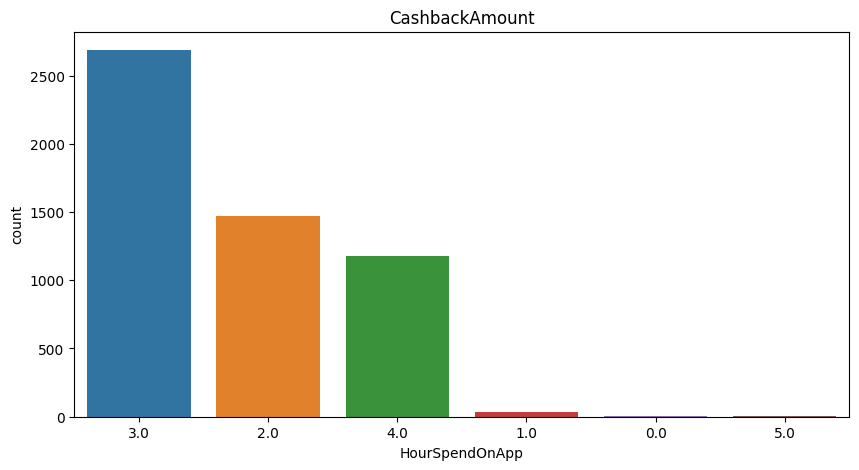

In [ ]:
category_counts = df['HourSpendOnApp'].value_counts().index

plt.figure(figsize=(10, 5))
sns.countplot(x=df['HourSpendOnApp'], order=category_counts)
plt.title('CashbackAmount')
plt.show()

## Insight

*   Grafik tersebut menunjukkan bahwa mayoritas pelanggan menghabiskan waktunya selama 3 jam di ecommerce tersebut, baik melalui aplikasi maupun website.
*   walaupun jumlah jam tertinggi yang dihabiskan pelanggan di situs ecommerce bukan yang terlama, jumlah cashback yang didapatkan pelanggan justru juga paling tinggi.

Hal tersebut dapat menjadi suatu cara untuk menarik pelanggan untuk tetap menggunakan layanan. Semakin lama waktu yang dihabiskan pelanggan di situs ecommerce, jumlah penjualan melalui ecommerce juga dapat meningkat yang juga didukung dengan adanya cashback yang ada.

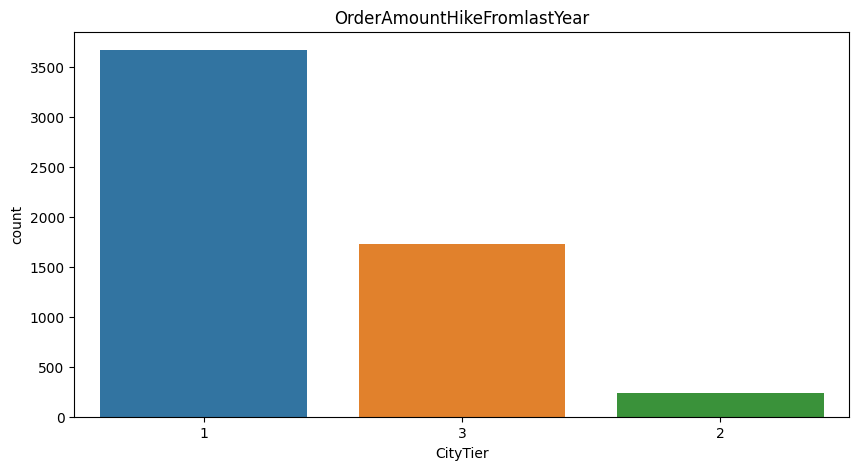

In [ ]:
category_counts = df['CityTier'].value_counts().index

plt.figure(figsize=(10, 5))
sns.countplot(x=df['CityTier'], order=category_counts)
plt.title('OrderAmountHikeFromlastYear')
plt.show()

## Insight

*   Grafik tersebut dapat dilihat bahwa mayoritas pelanggan berada di salah satu CityTier, yang dapat memberikan informasi penting dalam merencanakan strategi pemasaran atau layanan yang lebih tepat untuk kota-kota tersebut
- Data OrderAmountHikeFromlastYear menunjukkan seberapa besar kenaikan pesanan dari tahun sebelumnya, dan menunjukkan cara bagaiaman berkorelasi dengan cityTier untuk mendapatkan wawasan yang lebih

Menggunakan informasi CityTier, untuk mengkategorikan pelanggan menjadi
kelompok-kelompok berdasarkan lokasi geografis mereka. Ini memungkinkan Anda untuk
merancang strategi pemasaran yang lebih tepat dan layanan yang lebih sesuai dengan
kebutuhan masing-masing kota atau tier.

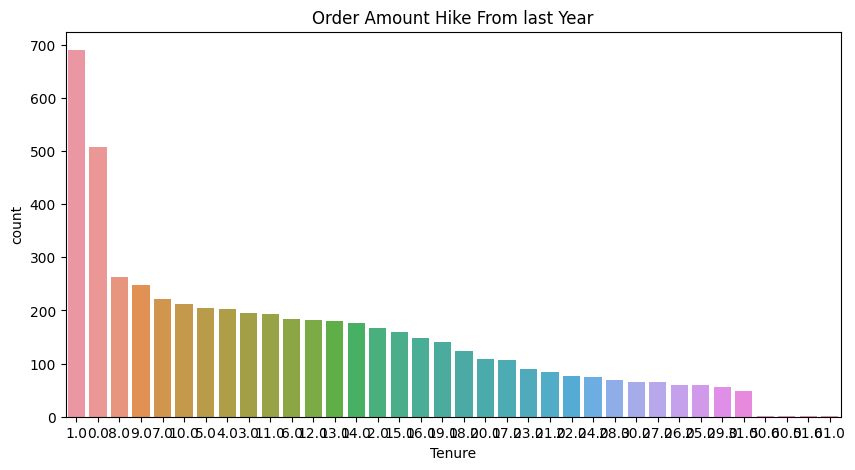

In [ ]:
category_counts = df['Tenure'].value_counts().index

plt.figure(figsize=(10, 5))
sns.countplot(x=df['Tenure'], order=category_counts)
plt.title('Order Amount Hike From last Year')
plt.show()

## Insight

*   Grafik tersebut dapat dilihat bahwa Tenure mengacu pada berapa lama pelanggan telah menjadi pelanggan perusahaan atau berapa lama mereka telah menggunakan layanan tertentu
- Mayoritas pelanggan memiliki Tenure yang relatif pendek, yang mengindikaskan bahwa ada sejumlah besar pelanggan baru atau pelanggan dengan waktu penggunaak layanan yang singkat

Informasi Tenure dapat menjadi relevan dalam merencanakan strategi bisnis dan pemasaran. Pelanggan dengan Tenure yang pendek mungkin memerlukan pendekatan yang berbeda dalam upaya retensi, sementara pelanggan dengan Tenure yang panjang mungkin cenderung lebih setia

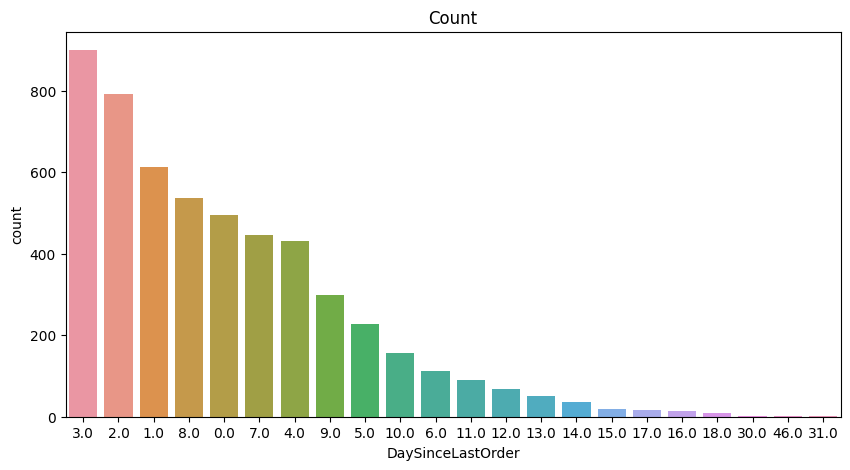

In [ ]:
category_counts = df['DaySinceLastOrder'].value_counts().index

plt.figure(figsize=(10, 5))
sns.countplot(x=df['DaySinceLastOrder'], order=category_counts)
plt.title('Count')
plt.show()

## Insight

*   Grafik menggambarkan sebaran jumlah hari sejak pesanan terakhir, hal tersebut memberikan pemahaman tentang seberapa sering pelanggan melakukan pesanan, dapat dilihat juga seberapa sering pesanan dilakukan
- Mayoritas pelanggan melakukan pesanan dalam jangka waktu yang relatif pendek sejak pesanan terakhir, yang mengindikasikan bahwa banyak pelanggan cendeung memesan produk atau layanan secara berkala

Informasi mengenai DaySinceLastOrder penting dalam merencanakan stok dan pelayanan, Pelanggan dengan jangka waktu pesanan yang singkat mungkin memerlukan perhatian khusus dalam pemenuhan pesanan, sementara pelanggan dengan jeda waktu yang lebih lama mungkin perlu diberikan insentif untuk meningkatkan frekuensi pesanan.

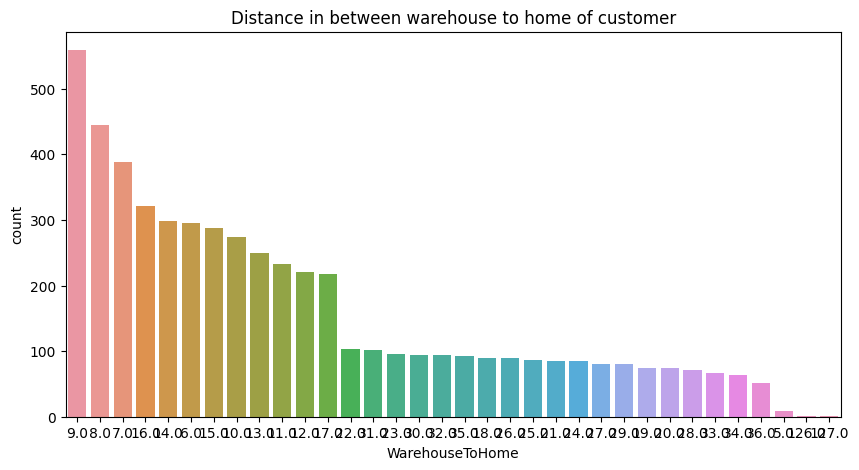

In [ ]:
category_counts = df['WarehouseToHome'].value_counts().index

plt.figure(figsize=(10, 5))
sns.countplot(x=df['WarehouseToHome'], order=category_counts)
plt.title('Distance in between warehouse to home of customer')
plt.show()

## Insight

*   Grafik menggambarkan sebaran jarak antara gudang dan rumah pelanggan. Hal ini memberikan pemahaman tentang berapa jauh produk harus diantarkan dari gudang ke rumah pelanggan.
- Mayoritas pelanggan memiiki jarak yang relatif pendek antara gudang dan rumah mereka, sebagian besar pelangan berada pada jarak yang cukup dekat dengan gudang
- Beberapa pelanggan berada dalam jarak yang sangat dekat, sementara yang lain harus dijangkau dalam jarak yang jauh, hal tersebut dapat mempengaruhi biaya pengiriman, waktu pengiriman, dan kualitas layanan yang diberikan

Analisis sebaran jarak dapat membantu untuk mengidentifikasi daerah yang mungkin
memerlukan pusat distribusi tambahan atau penyusunan ulang pusat distribusi yang ada.
perusahaan dapat memutuskan di mana sebaiknya menempatkan gudang baru atau pusat
distribusi regional untuk mengurangi jarak pengiriman.

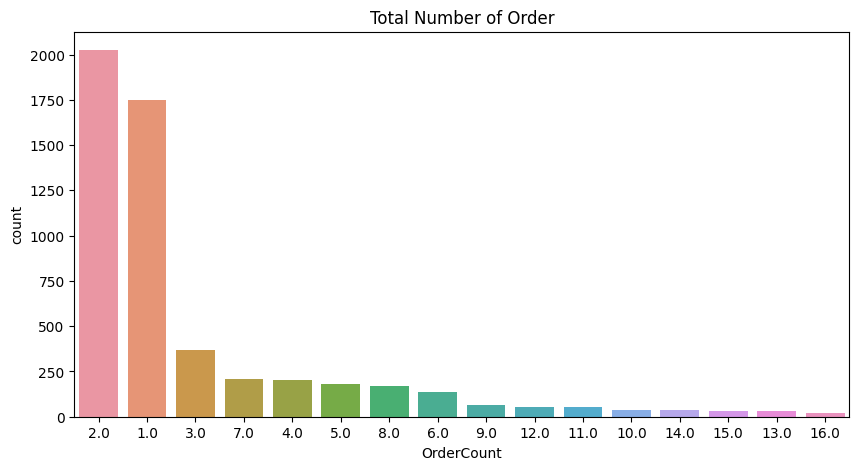

In [ ]:
category_counts = df['OrderCount'].value_counts().index

plt.figure(figsize=(10, 5))
sns.countplot(x=df['OrderCount'], order=category_counts)
plt.title('Total Number of Order')
plt.show()

## Insight

- Dapat dilihat dari grafik diatas, bahwa mayoritas pelanggan melakukan 2 kali transaksi dalam sebulan. Angka tersebut cenderung kecil.

Pelaku bisnis dapat merancang strategi pemasaran yang memungkinkan pelanggan untuk bertransaksi lebih sering, seperti dengan mengirimkan penawaran khusus atau mengadakan kampanye promosi. Transaksi banyak akan menambah pendapatan perushaan, sehinngga laba perusahaan akan menambah.

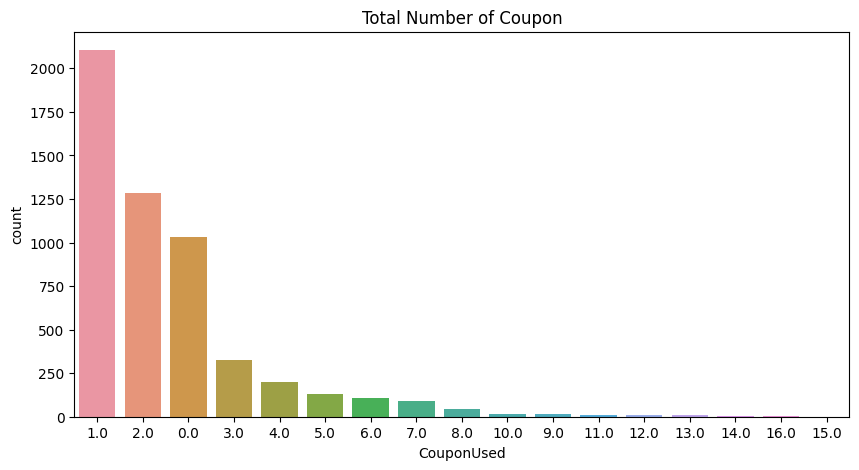

In [ ]:
category_counts = df['CouponUsed'].value_counts().index

plt.figure(figsize=(10, 5))
sns.countplot(x=df['CouponUsed'], order=category_counts)
plt.title('Total Number of Coupon')
plt.show()

## Insight

- Dari grafik dapat dilihat bahwa pelanggan kebanyakan menggunakan 0-1 kupon dalam sebulan terakhir.
- Grafik ini mengindikasikan bahwa mayoritas pelanggan e-commerce menggunakan kupon diskon atau promosi dalam jumlah yang sangat sedikit atau bahkan tidak menggunakan sama sekali selama sebulan terakhir.
- Rendahnya penggunaan kupon dapat disebabkan oleh berbagai faktor, seperti ketidakpengetahuan pelanggan tentang kupon yang tersedia, ketidakminatan dalam promosi, atau ketersediaan produk yang sesuai.

Pelaku bisnis dapat mengadakan promosi khusus atau kampanye yang mendorong pelanggan untuk memanfaatkan kupon lebih sering, seperti penawaran khusus agar pelanggan lebih aktif dalam penggunaan kupon tersebut. Selaim itu dapat diberikan langkah-langkah dalam penggunaan kupon tersebut, agar pelanggan lebih sering dalam menggunakan kupon.

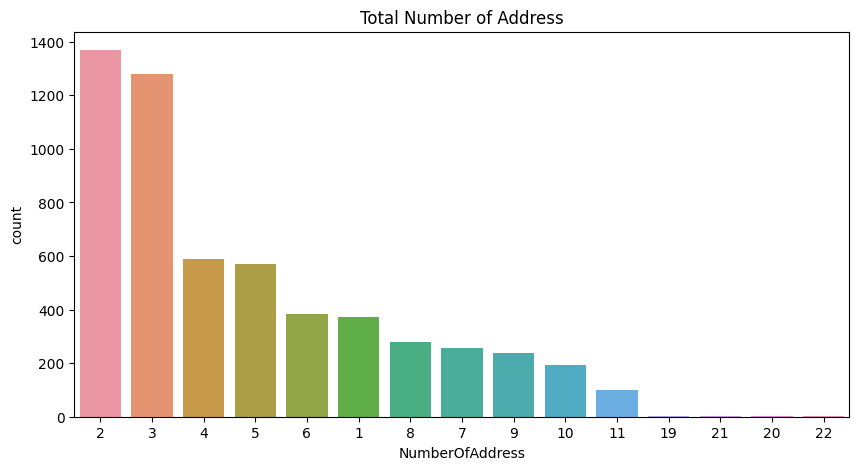

In [ ]:
category_counts = df['NumberOfAddress'].value_counts().index

plt.figure(figsize=(10, 5))
sns.countplot(x=df['NumberOfAddress'], order=category_counts)
plt.title('Total Number of Address')
plt.show()

## Insight

- Dapat dilihat bahwa kebanyakan pelanggan memiliki 2 alamat.
- Pelanggan yang memiliki dua alamat dapat lebih fleksibel dalam pengiriman pesanan. Mereka dapat memilih untuk mengirimkan pesanan ke alamat rumah pribadi atau ke alamat bisnis, tergantung pada kebutuhan dan preferensi mereka.
- Namun dengan memiliki 2 alamat dapat memunculkan memunculkan masalah terkait pengiriman jika tidak ditangani dengan baik. Misalnya, kesalahan dalam pemilihan alamat pengiriman atau tagihan dapat mengakibatkan penundaan atau ketidaknyamanan.
- Atau ada beberapa pelanggan menggunakan dua alamat juga dapat mencerminkan keinginan pelanggan untuk menjaga privasi atau keamanan. Mereka mungkin memilih untuk tidak menggunakan alamat pribadi untuk tujuan pengiriman demi menjaga kerahasiaan tempat tinggal mereka.

Pastikan perusahaan memiliki sistem manajemen alamat yang baik di tempat. Ini termasuk mengizinkan pelanggan untuk dengan mudah memilih alamat pengiriman dan tagihan yang benar saat mereka melakukan pemesanan. Berikan opsi yang jelas untuk memilih antara alamat rumah dan bisnis.


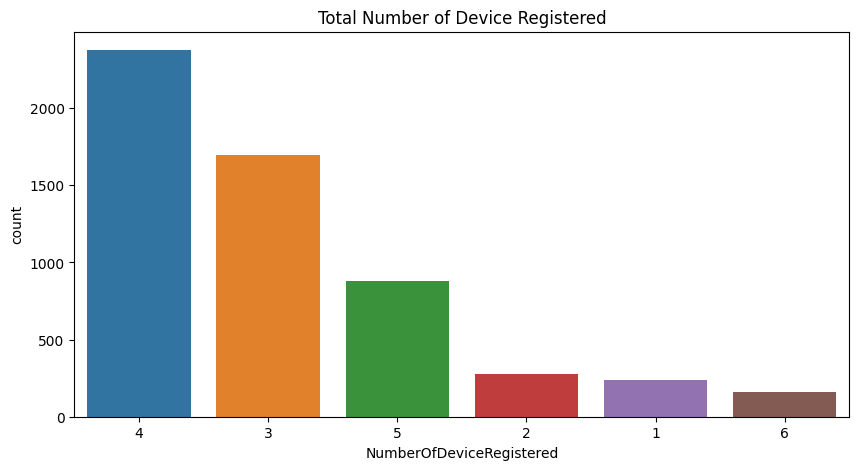

In [ ]:
category_counts = df['NumberOfDeviceRegistered'].value_counts().index

plt.figure(figsize=(10, 5))
sns.countplot(x=df['NumberOfDeviceRegistered'], order=category_counts)
plt.title('Total Number of Device Registered')
plt.show()

## Insight

- Dapat dilihat bahwa pelangga yang mempunyai 4 device memiliki nilai paling tinggi sebesar 43,1%, disusul denga pelanggan yang memiliki 3 device dan 5 device sebesar 28,6% & 26,1%, dan untuk sisanya untuk pelanggan yang memiliki 2,1, dan 6 device.
- Grafik ini mengindikasikan bahwa mayoritas pelanggan e-commerce menggunakan empat perangkat berbeda untuk berbelanja online.  Hal ini menunjukkan bahwa pelanggan e-commerce cenderung mengakses platform tersebut dari berbagai perangkat untuk berbelanja dan menjelajahi produk.
- Pelanggan yang menggunakan beberapa perangkat akan lebih fleksibel dalam aktivitas berbelanja mereka. Mereka dapat mulai mencari produk di salah satu perangkat dan melanjutkan pembelian mereka di perangkat lain tanpa kesulitan. Oleh karena itu Pastikan platform e-commerce dioptimalkan dan responsif untuk berbagai perangkat, termasuk desktop, ponsel, tablet, dan lainnya. Ini memastikan bahwa pelanggan memiliki pengalaman yang lancar saat berbelanja dari perangkat apa pun